# Bonus - Sentiment Analysis

In [1]:
#Sentiment Analysis - method of identifying attitudes in text data about a subject of interest 
#code help from https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/NLP_Project_4/datasets/comments_clean.csv')

In [73]:
from textblob import TextBlob

In [74]:
# Define a function that accepts text and returns the polarity.
# SA is scored using polarity values that range from 1 to -1 
# Values closer to 1 indicate more positivity, while closer to -1 indicate negativity 
#code help from https://textblob.readthedocs.io/en/dev/

def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [75]:
%%time
#code help from https://textblob.readthedocs.io/en/dev/
# Create a new DataFrame column for sentiment 

df['sentiment'] = df.body.apply(detect_sentiment)

CPU times: user 1.83 s, sys: 71.3 ms, total: 1.9 s
Wall time: 5.5 s


In [76]:
df.head(1)

,body,target,sentiment
0,removed,1,0.0


In [77]:
print(df["body"].iloc[0], " --> ", df["sentiment"].iloc[0])

removed   -->  0.0


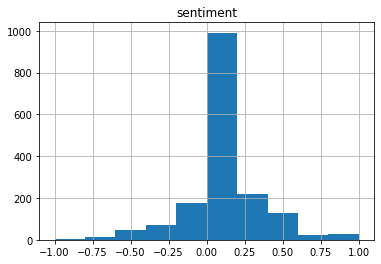

In [78]:
# elon sentiment histogram
df[df['target'] == 1].hist(column='sentiment');

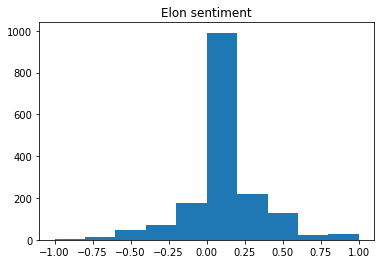

In [79]:
# Elon sentiment histogram
elon = df[df['target'] == 1]
plt.hist(elon['sentiment'])
plt.title('Elon sentiment');

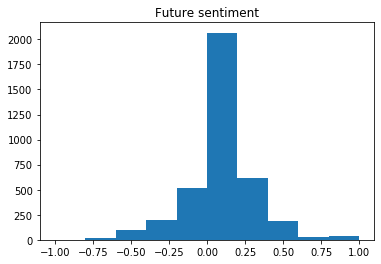

In [80]:
# Future sentiment histogram
future = df[df['target'] == 0]
plt.hist(future['sentiment'])
plt.title('Future sentiment');

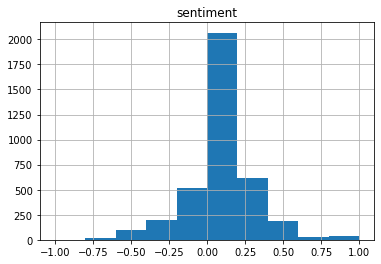

In [81]:
# future sentiment histogram
df[df['target'] == 0].hist(column='sentiment');

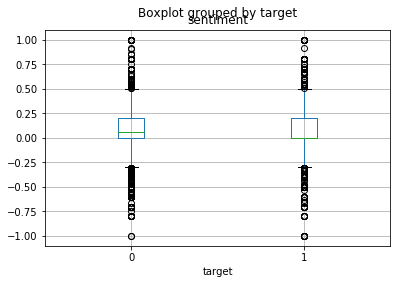

In [82]:
df.boxplot(column='sentiment', by='target');

In [83]:
print('Elon mean sentiment:', df[df['target'] == 1].sentiment.mean())
print('Future mean sentiment:', df[df['target'] == 0].sentiment.mean())
print('')
print('Elon median sentiment:', df[df['target'] == 1].sentiment.median())
print('Future median sentiment:', df[df['target'] == 0].sentiment.median())

Elon mean sentiment: 0.08282271723119758
Future mean sentiment: 0.07870007673671667

Elon median sentiment: 0.0
Future median sentiment: 0.05624999999999999


In [17]:
df.to_csv('add_sentiment.csv', index=False)

#### Expirementing with textblob

In [84]:
#code help from https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

text_blob_object = TextBlob('lol they all have live gerontocracy')

In [85]:
#code help from https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

document_sentence = text_blob_object.sentences

print(document_sentence)
print(len(document_sentence))

[Sentence("lol they all have live gerontocracy")]
1


In [86]:
#code help from https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

document_words = text_blob_object.words

print(document_words)
print(len(document_words))

['lol', 'they', 'all', 'have', 'live', 'gerontocracy']
6


### spaCy and GenSim

In [87]:
#code help from https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/
import spacy

In [1]:
#Cant get the model "en_core_web_lg" to work, commenting out but keeping incase I come back to this

In [89]:
## call model
#ner = spacy.load("en_core_web_lg")
## tag text
#txt = df["body"].iloc[0]
#doc = ner(txt)
## display result
#spacy.displacy.render(doc, style="ent")

In [90]:
#code help from https://www.machinelearningplus.com/nlp/gensim-tutorial/

import gensim.downloader as gensim_api

In [91]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [92]:
word = "tesla"
nlp[word]

array([ 5.6732e-01,  3.7172e-01, -7.1755e-01, -2.7696e-01, -4.2490e-01,
       -2.3132e-01, -2.4973e-01, -8.0251e-01,  2.2343e-02, -1.4905e-01,
        2.1906e-01,  1.5724e-01,  5.2333e-01, -4.2956e-03,  3.0360e-01,
        8.8224e-01, -1.5783e-01, -1.0697e+00,  1.7511e-02, -3.7927e-01,
        7.6088e-01,  2.8916e-01, -2.0405e-01,  2.7459e-01,  7.0138e-01,
        1.6498e-02,  1.0507e-01,  2.5980e-01,  4.2311e-01, -3.3175e-01,
        2.4077e-01,  2.7404e-02,  6.3209e-02,  3.6149e-01,  3.4251e-01,
       -7.0358e-02, -1.6776e-01,  5.0169e-02,  4.8273e-01, -1.3947e-01,
        2.4401e-01,  1.5189e-01, -9.6140e-01,  8.9001e-01,  1.7506e-01,
        1.1274e-02,  2.5021e-02, -2.6856e-01, -2.9203e-01,  1.1211e-01,
        5.0084e-01, -8.4873e-02,  7.2807e-01,  3.9346e-01, -6.5378e-02,
       -6.8980e-02,  1.9830e-01, -1.0551e-01,  2.2801e-01, -6.2504e-02,
       -4.6082e-01, -3.7523e-02,  7.5292e-01, -5.8066e-01, -1.4573e-01,
        3.1654e-01, -6.4370e-01,  1.9541e-01, -4.6504e-01, -8.71

In [66]:
nlp['tesla'].shape

(300,)

In [69]:
from sklearn import feature_extraction, manifold

Text(5, 2, 'tesla')

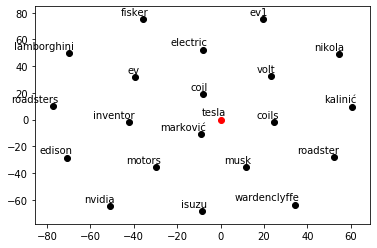

In [70]:
## find closest vectors
labels, X, x, y = [], [], [], []
for t in nlp.most_similar(word, topn=20):
    X.append(nlp[t[0]])
    labels.append(t[0])
## reduce dimensions
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
new_values = pca.fit_transform(X)
for value in new_values:
    x.append(value[0])
    y.append(value[1])
## plot
fig = plt.figure()
for i in range(len(x)):
    plt.scatter(x[i], y[i], c="black")
    plt.annotate(labels[i], xy=(x[i],y[i]), xytext=(5,2), 
               textcoords='offset points', ha='right', va='bottom')
## add center
plt.scatter(x=0, y=0, c="red")
plt.annotate(word, xy=(0,0), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

In [ ]:
#code help https://towardsdatascience.com/natural-language-processing-with-fasttext-part-1-an-intro-to-text-classification-with-fasttext-11b9771722d8

In [ ]:
#Fasttext - USED THIS  IN THE TERMINAL per instructions in above link 

# Extra Bonus work - time series using quandl  (not used in presentation)

In [22]:
#imported module and requested API key from https://www.quandl.com/sign-up

import quandl
quandl.ApiConfig.api_key = 'hrnnFQXzpxc6KLPGpnK2'

In [23]:
tesla = quandl.get('WIKI/TSLA')
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


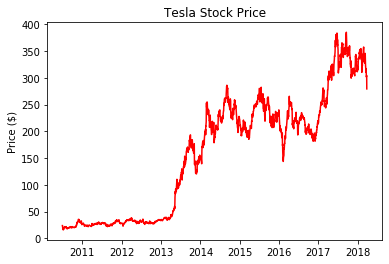

In [24]:
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)');
plt.show();

In [25]:
# Yearly average number of shares outstanding for Tesla
#pulled from quandl.com
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

In [26]:
# Create a year column 
tesla['Year'] = tesla.index.year

In [27]:
# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0

In [28]:
import pandas as geek

In [29]:
# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)

In [30]:
# Update the cap column to shares times the price
#ix is deprecated, changed to .loc
#creates a "cap" column for tesla 
tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']

In [31]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,0.0
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,0.0
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,0.0
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,0.0
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,0.0


In [32]:
#adding GM details because now I am curious

In [33]:
# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


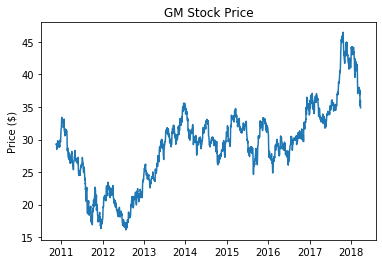

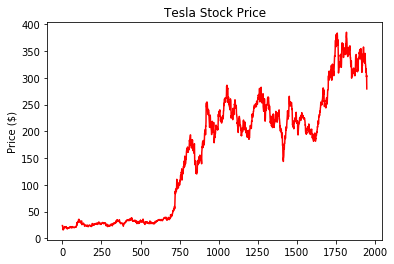

In [34]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)');
plt.show()
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)');
plt.show();

In [35]:
#pulled from quandl.com
gm_shares = {2018: 1.42e9, 
             2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

In [36]:
#help for this code comes from 
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how='inner', on='Date')

In [37]:
print(sorted(cars.columns))

['Adj. Close_x', 'Adj. Close_y', 'Adj. High_x', 'Adj. High_y', 'Adj. Low_x', 'Adj. Low_y', 'Adj. Open_x', 'Adj. Open_y', 'Adj. Volume_x', 'Adj. Volume_y', 'Close_x', 'Close_y', 'Date', 'Ex-Dividend_x', 'Ex-Dividend_y', 'High_x', 'High_y', 'Low_x', 'Low_y', 'Open_x', 'Open_y', 'Split Ratio_x', 'Split Ratio_y', 'Volume_x', 'Volume_y', 'Year', 'cap']


In [38]:
#cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)

In [39]:
gm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [40]:
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'Year', 'cap'],
      dtype='object')

In [41]:
# Select only the relevant columns
#cars = cars[['Date', 'gm_cap', 'tesla_cap']]

# Divide to get market cap in billions of dollars
#cars['gm_cap'] = cars['gm_cap'] / 1e9
#cars['tesla_cap'] = cars['tesla_cap'] / 1e9
#cars.head()